In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\kerry\OneDrive\HAP 774\all-mg-codes.txt", delimiter='xxxx')

C:\Users\kerry\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df['image'] = df.apply(lambda r: r[0].split('\t')[0], axis=1)

In [4]:
df['classes'] = df.apply(lambda r: r[0].split('\t')[1], axis=1)

In [5]:
df = pd.concat([df['image'],df['classes'].str.split(' ', expand=True)], axis=1)

In [6]:
df.columns.values[1] = "class"

In [7]:
df['class'] = df['class'].astype(int)

In [8]:
df

,image,class,1,2,3
0,im0002,13,9,None,None
1,im0003,14,None,None,None
2,im0004,14,3,None,None
3,im0005,3,5,None,None
4,im0006,14,None,None,None
5,im0007,13,14,9,10
6,im0008,13,14,9,None
7,im0009,7,None,None,None
8,im0010,14,None,None,None
9,im0011,13,14,None,None


In [9]:
import seaborn as sns
sns.countplot(x = 'class', data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EEA63EEB00>]],
      dtype=object)

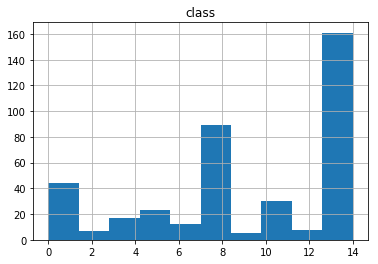

In [10]:
df.hist('class')

In [11]:
df['class'].value_counts()

14    100
7      66
13     61
0      39
8      23
5      23
10     16
11     14
6      12
4      11
12      8
2       7
3       6
9       5
1       5
Name: class, dtype: int64

In [12]:
df = df[['image', 'class']]
df.head()

,image,class
0,im0002,13
1,im0003,14
2,im0004,14
3,im0005,3
4,im0006,14


In [13]:
from PIL import Image

In [14]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [15]:
class eDL(Dataset):
    def __init__(self, labels, transform=None, target_transform=None):
        self.img_labels = labels
        
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        

        img_path = "C:/Users/kerry/OneDrive/HAP 774/all-images/" + self.img_labels.loc[idx,'image'] + '.ppm'
        image = Image.open(img_path)
        
        
        
        label = self.img_labels.loc[idx, 'class']
        
        if self.transform:
            image = self.transform(image)
        #if self.target_transform:
        #    label = self.target_transform(label)
        return image, label

In [16]:
len(df)

396

In [17]:
df.dtypes

image    object
class     int32
dtype: object

In [94]:
import numpy as np

In [95]:
df['class'] = df['class'].astype(np.int64)

In [96]:
df.dtypes

image    object
class     int64
dtype: object

In [18]:
#df['class'] = df['class'].apply(str)

In [19]:
#df.dtypes

In [97]:
from torchvision import datasets, transforms

In [98]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    #transforms.Normalize(
     #   mean=[0.485, 0.456, 0.406],
      #  std=[0.229, 0.224, 0.225])
        ])

In [99]:
df=df.sample(frac=1, random_state=1000).reset_index(drop=True)

In [100]:
tr_df = df[:int(len(df)*0.8)].reset_index(drop=True)
ts_df = df[int(len(df)*0.8):].reset_index(drop=True)

In [101]:
ts_df[ts_df['image'] == 'im0050']

,image,class
6,im0050,7


In [102]:
tr=eDL(tr_df[['image','class']], preprocess)
ts=eDL(ts_df[['image','class']], preprocess)

In [103]:
len(ts_df)

80

In [104]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(tr, batch_size=64, shuffle=True)
test_dataloader = DataLoader(ts, batch_size=64, shuffle=True)


In [143]:
len(y)

64

In [105]:
#X is image
#y is label

for X, y in train_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 3, 224, 224])
Shape of y:  torch.Size([64]) torch.int64


In [106]:
#X is image
#y is label

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 3, 224, 224])
Shape of y:  torch.Size([64]) torch.int64


In [107]:
ts.__len__()

80

In [108]:
from torch import nn

#torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1
#color images have 3 channels - RGB

In [154]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 12, 4, 2)
        
        self.conv2 = nn.Conv2d(12, 24, 4, 2)
        
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            
            nn.Linear(in_features=69984, out_features=50),
            #nn.Linear(in_features = 12*111*111, out_features = 50),
            nn.ReLU(),
            nn.Linear(50, 15)
        )

    def forward(self, x):
        
        #print("original", x.shape)
        x = self.conv1(x)
        #print("after conv1", x.shape)
        
        x = self.conv2(x)
        #print("after conv2", x.shape)
        
        x = self.flatten(x)
        #print("after flatten",x.shape)

        logits = self.linear_relu_stack(x)
        #print('final ', logits.shape)
        return logits

In [155]:
model = NeuralNetwork().to('cpu')

In [156]:
#loss_fn = nn.MultiMarginLoss()
#loss_fn = nn.MSELoss()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [157]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to('cpu'), y.to('cpu')

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [158]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to('cpu'), y.to('cpu')
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            #correct += (pred.argmax(1) == y).type(torch.int).sum().item()
            #correct += (pred.argmax(1) == y).type(torch.long).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [159]:
epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.686572  [    0/  316]
Test Error: 
 Accuracy: 33.8%, Avg loss: 2.578592 

Epoch 2
-------------------------------
loss: 2.601370  [    0/  316]
Test Error: 
 Accuracy: 26.2%, Avg loss: 2.495837 

Epoch 3
-------------------------------
loss: 2.510431  [    0/  316]
Test Error: 
 Accuracy: 26.2%, Avg loss: 2.439005 

Epoch 4
-------------------------------
loss: 2.498717  [    0/  316]
Test Error: 
 Accuracy: 26.2%, Avg loss: 2.447237 

Epoch 5
-------------------------------
loss: 2.329591  [    0/  316]
Test Error: 
 Accuracy: 26.2%, Avg loss: 2.426916 

Epoch 6
-------------------------------
loss: 2.397904  [    0/  316]
Test Error: 
 Accuracy: 26.2%, Avg loss: 2.356873 

Epoch 7
-------------------------------
loss: 2.296117  [    0/  316]
Test Error: 
 Accuracy: 26.2%, Avg loss: 2.270365 

Epoch 8
-------------------------------
loss: 2.265572  [    0/  316]
Test Error: 
 Accuracy: 26.2%, Avg loss: 2.267853 

Epoch 9
----------------

In [160]:
from torchvision import models

In [161]:
resnet = models.resnet101(pretrained=True)

In [162]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [163]:
for w in resnet.parameters():
    w.requires_grad = False

In [164]:
resnet.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [165]:
resnet.fc = nn.Linear(2048, 15)

In [166]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [167]:
resnet = resnet.to('cpu')

In [168]:

epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, resnet, loss_fn, optimizer)
    print('after train')
    test(test_dataloader, resnet, loss_fn)
print("Done!")

Epoch 1
-------------------------------


C:\Users\kerry\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


loss: 2.729172  [    0/  316]
after train
Test Error: 
 Accuracy: 1.2%, Avg loss: 2.774575 

Epoch 2
-------------------------------
loss: 2.713650  [    0/  316]
after train
Test Error: 
 Accuracy: 5.0%, Avg loss: 2.778801 

Epoch 3
-------------------------------
loss: 2.739743  [    0/  316]
after train
Test Error: 
 Accuracy: 7.5%, Avg loss: 2.730720 

Epoch 4
-------------------------------
loss: 2.722939  [    0/  316]
after train
Test Error: 
 Accuracy: 7.5%, Avg loss: 2.762295 

Epoch 5
-------------------------------
loss: 2.708504  [    0/  316]
after train
Test Error: 
 Accuracy: 10.0%, Avg loss: 2.730024 

Epoch 6
-------------------------------
loss: 2.752033  [    0/  316]
after train
Test Error: 
 Accuracy: 7.5%, Avg loss: 2.766034 

Epoch 7
-------------------------------
loss: 2.686816  [    0/  316]
after train
Test Error: 
 Accuracy: 7.5%, Avg loss: 2.753326 

Epoch 8
-------------------------------
loss: 2.728656  [    0/  316]
after train
Test Error: 
 Accuracy: 6.